In [7]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('Bitcoin Historical Data.csv')

df['Date'] = pd.to_datetime(df['Date'])

df1 = df.set_index(['Date'])
#df1 = df1.loc[:, ['Price']]
df1['Price'] = df1['Price'].str.replace(',', '').astype('float')
df1['Open'] = df1['Open'].str.replace(',', '').astype('float')
df1['High'] = df1['High'].str.replace(',', '').astype('float')
df1['Low'] = df1['Low'].str.replace(',', '').astype('float')

for i in range(len(list(df1['Vol.']))):
    if list(df1['Vol.'])[i].endswith('K'):
        temp = list(df1['Vol.'])[i].replace('K', '')
        df1['Vol.'][i] = float(temp) * 1000
    else:
        temp2 = list(df1['Vol.'])[i].replace('M', '')
        df1['Vol.'][i] = float(temp2) * 1000000
        
df1['Vol.'] = df1['Vol.'].astype('int')

#df1.reset_index(inplace=True)

df1 = df1.loc[::-1]
#df1 = df1.set_index(['Date'])
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-01-01,314.9,318.2,321.4,313.5,12820,-1.05%
2015-01-02,315.2,314.9,316.4,313.1,14730,0.10%
2015-01-03,287.1,315.2,315.8,284.9,47370,-8.91%
2015-01-04,264.7,287.1,289.9,255.9,88770,-7.80%
2015-01-05,274.8,264.7,278.3,262.9,54990,3.82%
...,...,...,...,...,...,...
2021-03-24,52325.4,54309.1,57169.4,51725.4,137910,-3.91%
2021-03-25,51322.3,52330.0,53175.4,50441.3,143350,-1.92%
2021-03-26,55036.1,51317.4,55074.1,51302.0,100300,7.24%


In [3]:
df_p = df1.loc[:, ['Price']]

In [4]:
df_p


,Price
2278,314.9
2277,315.2
2276,287.1
2275,264.7
2274,274.8
...,...
4,52325.4
3,51322.3
2,55036.1
1,55862.9


In [13]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델 학습
model = ARIMA(df_p.Price.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2278
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17434.998
Method:                       css-mle   S.D. of innovations            510.149
Date:                Mon, 29 Mar 2021   AIC                          34881.995
Time:                        23:26:40   BIC                          34916.382
Sample:                             1   HQIC                         34894.538
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4262     12.193      2.003      0.045       0.528      48.324
ar.L1.D.y      0.8609      0.443      1.944      0.052      -0.007       1.729
ar.L2.D.y     -0.0667      0.353     -0.189      0.8

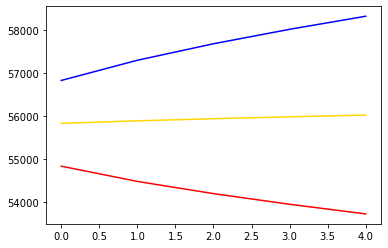

In [14]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측
pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터 (2021-03-24 ~ 2021-03-28)
#test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프

In [15]:
#400일 학습시켜서 향후 5일 분석

df400 = df_p[-400:-5]
df400

df_short = df_p[-5:]


In [16]:
model = ARIMA(df400.Price.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  394
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3294.381
Method:                       css-mle   S.D. of innovations           1035.273
Date:                Mon, 29 Mar 2021   AIC                           6600.761
Time:                        23:27:03   BIC                           6624.619
Sample:                             1   HQIC                          6610.215
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.9344     58.573      1.894      0.058      -3.867     225.736
ar.L1.D.y      0.7639      0.762      1.002      0.316      -0.730       2.257
ar.L2.D.y     -0.0415      0.567     -0.073      0.9

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


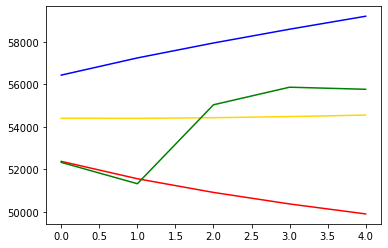

In [17]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측
pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터 (2021-03-24 ~ 2021-03-28)
bitcoin_test_df = df_short
test_y = bitcoin_test_df.Price.values # 실제 5일 가격 데이터 (2021-03-24 ~ 2021-03-28)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

### KOSPI, S&P500, Bitcoin 기초통계량

In [65]:



kospi= fdr.DataReader("KS11","2015")
sp = fdr.DataReader("US500","2015")

code_list = ["KS11","US500"]
index_list = [fdr.DataReader(code, "2015")["Close"] for code in code_list]
ks_sp =pd.concat(index_list,axis=1)

ks_sp.columns = code_list
ks_sp.columns

ks_sp.dropna()

,KS11,US500
Date,,
2015-01-02,1926.44,2058.20
2015-01-05,1915.75,2020.58
2015-01-06,1882.45,2002.61
2015-01-07,1883.83,2025.90
2015-01-08,1904.65,2062.14
...,...,...
2021-03-22,3035.46,3940.59
2021-03-23,3004.74,3910.52
2021-03-24,2996.35,3889.14


In [78]:
basic_kssp = ks_sp.describe()


In [83]:
basic_coin = df_p.dropna().describe()
basic_coin.columns = ['Bitcoin']

In [84]:
ks_sp_coin = pd.concat([basic_kssp, basic_coin], axis=1)
ks_sp_coin

,KS11,US500,Bitcoin
count,1533.000000,1569.000000,2279.000000
mean,2193.999452,2628.074716,6657.748135
std,264.258649,505.939339,9140.023122
min,1457.640000,1829.080000,164.900000
25%,2019.030000,2131.520000,605.550000
50%,2110.590000,2632.560000,4612.900000
75%,2352.970000,2923.430000,9071.000000
max,3208.990000,3974.540000,61195.300000


### Prophet 시계열 (미완성 - 라이브러리 다운 X)

In [120]:
conda install -c conda-forge fbprophet

^C

Note: you may need to restart the kernel to use updated packages.


In [119]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(df400)

ModuleNotFoundError: No module named 'fbprophet'